In [2]:
## Pandas and numpy for data processing
import pandas as pd
import numpy as np

# Plotting things with seaborn and pyplot
import seaborn as sns
import matplotlib.pyplot as plt

# StatsModels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.gam.api import GLMGam, BSplines

# Scikit-Learn
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import get_scorer_names
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import SplineTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingRegressor, BaggingClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC

In [3]:
# Loading the dataset
dat = pd.read_csv('Titanic-Dataset-clean.csv', low_memory=False)
dat.head()

,PassengerId,Survived,Pclass,FullName,LastName,Prefix,FirstName,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",Braund,Mr,Owen Harris,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings,Mrs,John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",Heikkinen,Miss,Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle,Mrs,Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",Allen,Mr,William Henry,male,35.0,0,0,373450,8.0500,S


In [26]:
dat.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,448.289773,0.385227,2.302273,29.501705,0.529545,0.384091,32.480501
std,256.854556,0.486926,0.836861,14.189949,1.108059,0.808218,49.937472
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,226.750000,0.000000,2.000000,20.000000,0.000000,0.000000,7.925000
50%,448.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.458300
75%,670.250000,1.000000,3.000000,38.000000,1.000000,0.000000,31.275000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


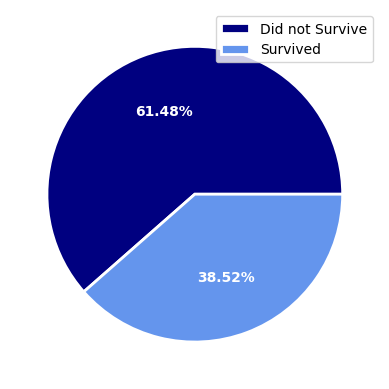

In [16]:
labels = ["Did not Survive", "Survived"]
dat.Survived.value_counts().plot(kind = 'pie', 
                                 autopct="%0.2f%%", 
                                 #labels = labels, 
                                 wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white'}, 
                                 colors = ['navy', 'cornflowerblue'], 
                                 textprops={'color': 'white', 'weight': 'bold'})
plt.ylabel("")
plt.legend(labels, loc="upper right")
plt.show()

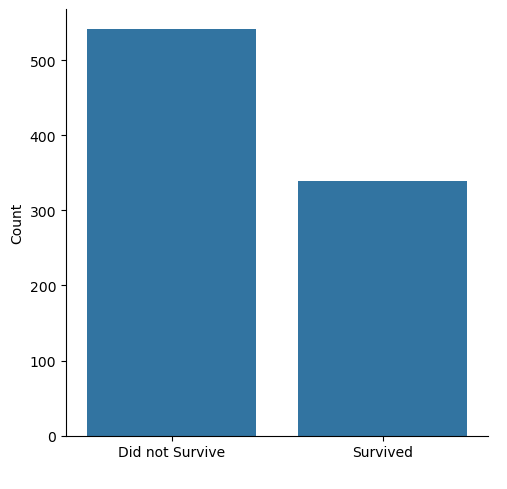

In [13]:
ax = sns.catplot(
    data = dat, 
    x = 'Survived', 
    kind = 'count')

ax.set_xticklabels(["Did not Survive", "Survived"])

plt.xlabel(" ")
plt.ylabel("Count")

plt.show()

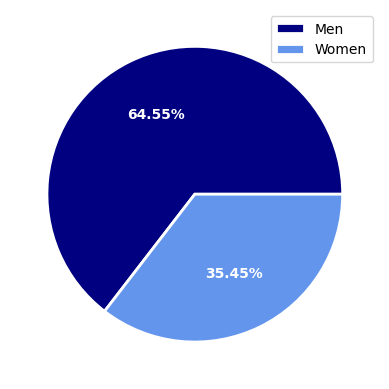

In [24]:
labels = ["Men", "Women"]
dat.Sex.value_counts().plot(kind = 'pie', 
                                 autopct="%0.2f%%", 
                                 #labels = labels, 
                                 wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white'}, 
                                 colors = ['navy', 'cornflowerblue'], 
                                 textprops={'color': 'white', 'weight': 'bold'})
plt.ylabel("")
plt.legend(labels, loc="upper right")
plt.show()

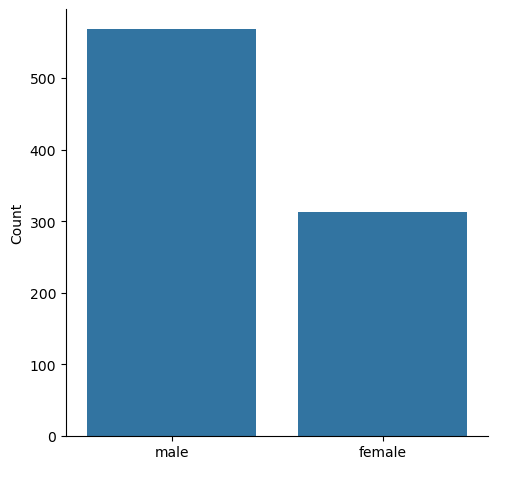

In [33]:
ax = sns.catplot(
    data = dat, 
    x = 'Sex', 
    kind = 'count')

#ax.set_xticklabels(["Did not Survive", "Survived"])

plt.xlabel(" ")
plt.ylabel("Count")

plt.show()

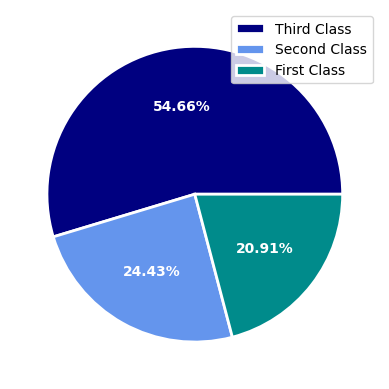

In [30]:
labels = ["Third Class", "Second Class", "First Class"]
dat.Pclass.value_counts().plot(kind = 'pie', 
                                 autopct="%0.2f%%", 
                                 #labels = labels, 
                                 wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white'}, 
                                 colors = ['navy', 'cornflowerblue', 'darkcyan'], 
                                 textprops={'color': 'white', 'weight': 'bold'})
plt.ylabel("")
plt.legend(labels, loc="upper right")
plt.show()

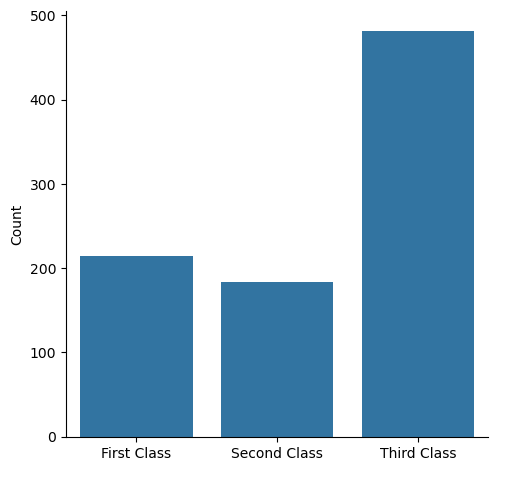

In [36]:
ax = sns.catplot(
    data = dat, 
    x = 'Pclass', 
    kind = 'count')

ax.set_xticklabels(["First Class", "Second Class", "Third Class"])

plt.xlabel(" ")
plt.ylabel("Count")

plt.show()

/tmp/ipykernel_433/3963491672.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Men", "Women"])


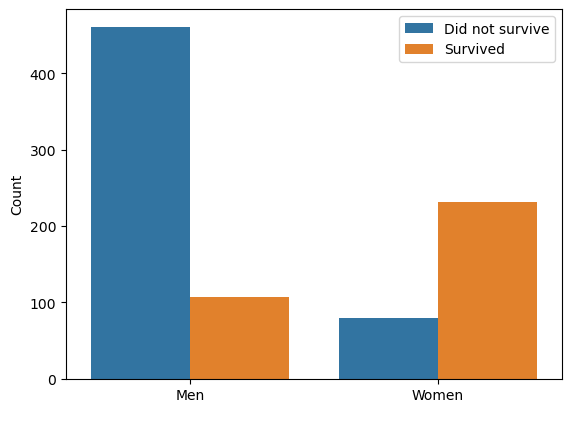

In [34]:
ax = sns.countplot(x="Sex", hue="Survived", data=dat)

ax.set_xlabel(" ")
ax.set_ylabel("Count")

ax.set_xticklabels(["Men", "Women"])
ax.legend(labels=["Did not survive", "Survived"])

plt.show()

/tmp/ipykernel_433/1885071482.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["First Class", "Second Class", "Third Class"])


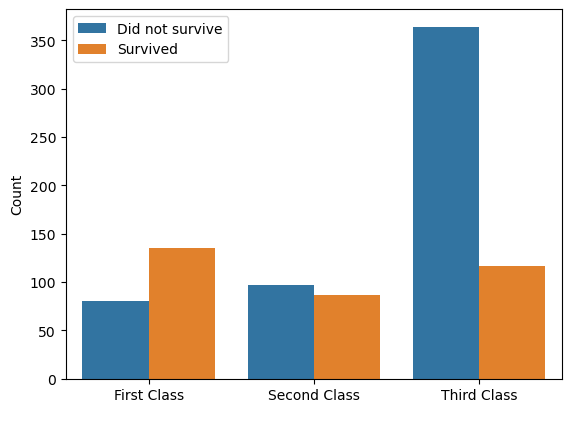

In [6]:
ax = sns.countplot(x="Pclass", hue="Survived", data=dat)

ax.set_xlabel(" ")
ax.set_ylabel("Count")

ax.set_xticklabels(["First Class", "Second Class", "Third Class"])
ax.legend(labels=["Did not survive", "Survived"])

plt.show()

/tmp/ipykernel_433/2019958925.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["First Class", "Second Class", "Third Class"])


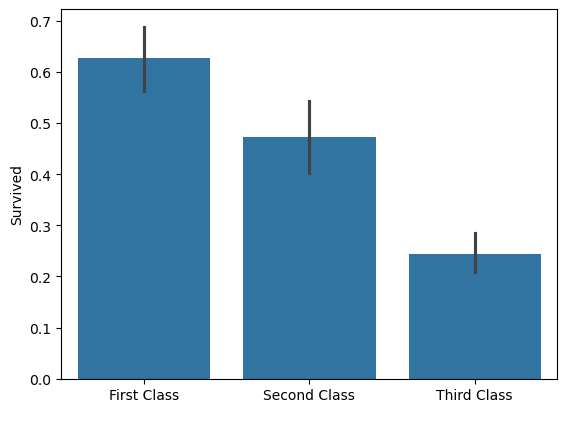

In [43]:
ax = sns.barplot(x="Pclass", y="Survived", data=dat)

#ax.set_title("Survival Probability by Passenger Class")
ax.set_xlabel(" ")
ax.set_xticklabels(["First Class", "Second Class", "Third Class"])

plt.show()

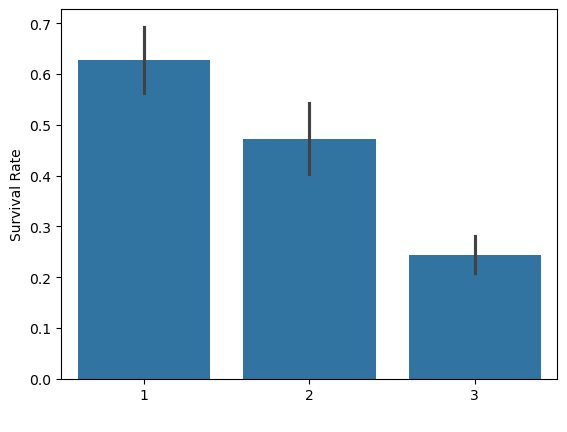

In [42]:
sns.barplot(x="Pclass", y="Survived", data=dat)  
#plt.title("Survival Probability by Passenger Class")
plt.xlabel(" ")
plt.ylabel("Survival Rate")
plt.show()

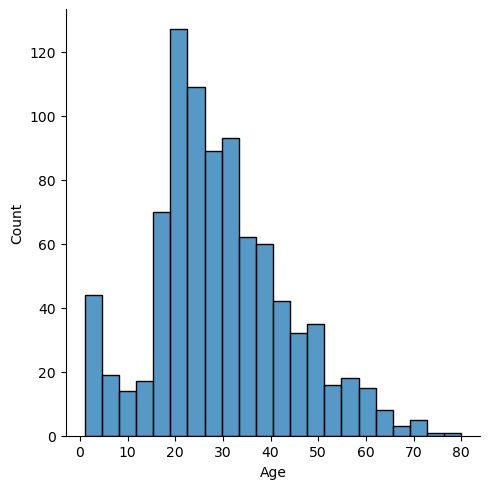

In [8]:
sns.displot(dat['Age'])
plt.show()

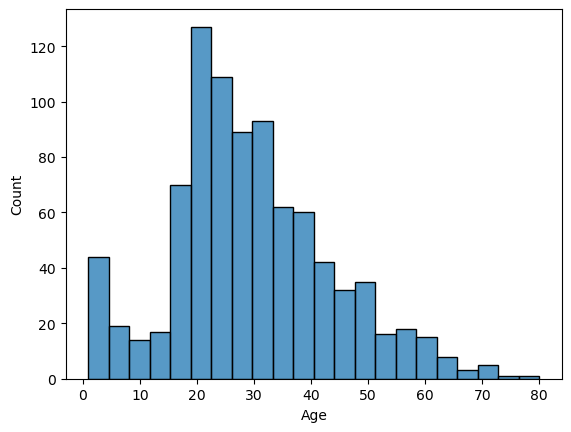

In [4]:
sns.histplot(dat['Age'])
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

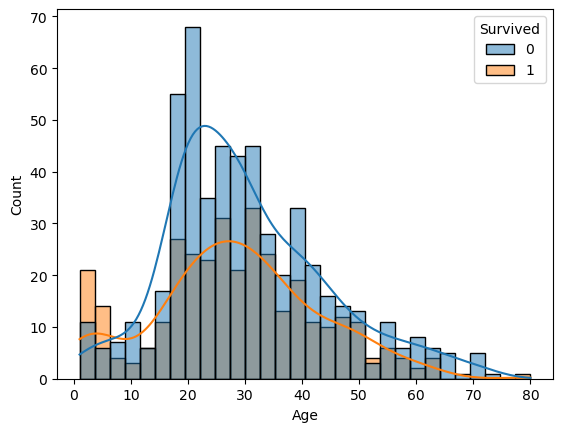

In [23]:
sns.histplot(dat, x="Age", hue="Survived", bins=30, kde=True)

<Axes: xlabel='Survived', ylabel='Age'>

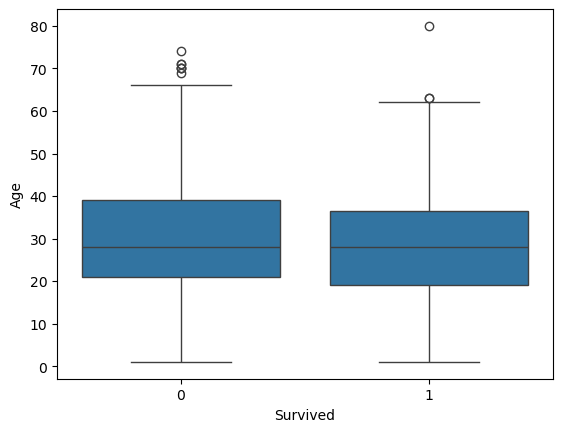

In [24]:
sns.boxplot(x="Survived", y="Age", data=dat)

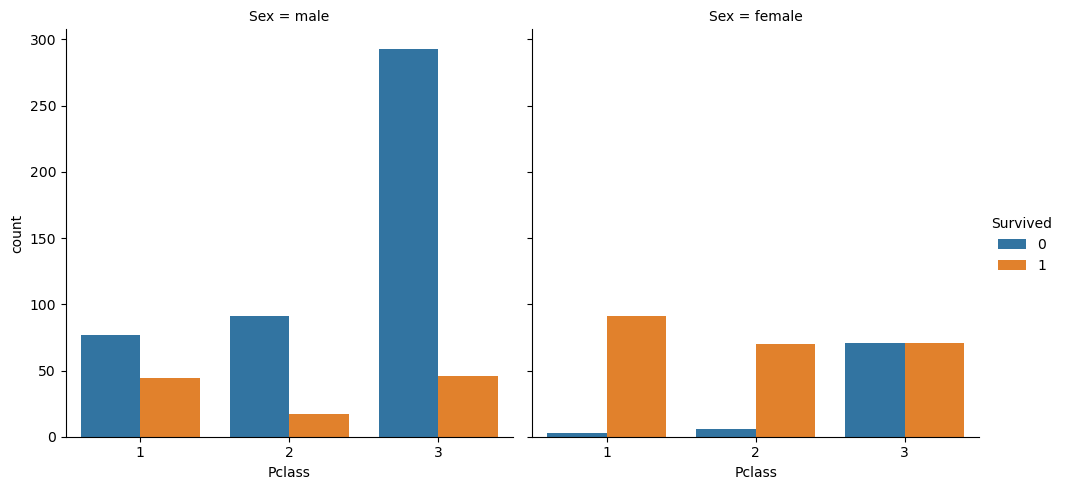

In [25]:
sns.catplot(x="Pclass", hue="Survived", col="Sex", kind="count", data=dat)

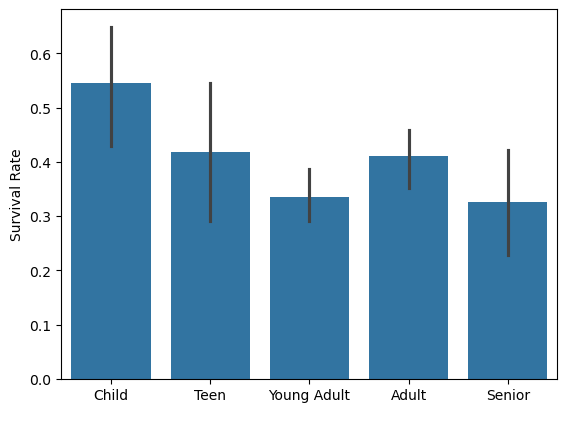

In [45]:
bins = [0, 12, 18, 30, 50, 80]
labels = ["Child", "Teen", "Young Adult", "Adult", "Senior"]
dat["AgeGroup"] = pd.cut(dat["Age"], bins=bins, labels=labels, right=False)

sns.barplot(data=dat, x="AgeGroup", y="Survived")
plt.xlabel(" ")
plt.ylabel("Survival Rate")
plt.show()

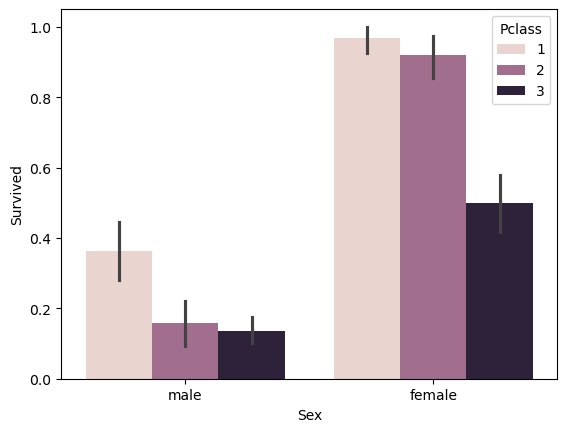

In [10]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=dat)
plt.show()

/tmp/ipykernel_433/2695665880.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Men", "Women"])


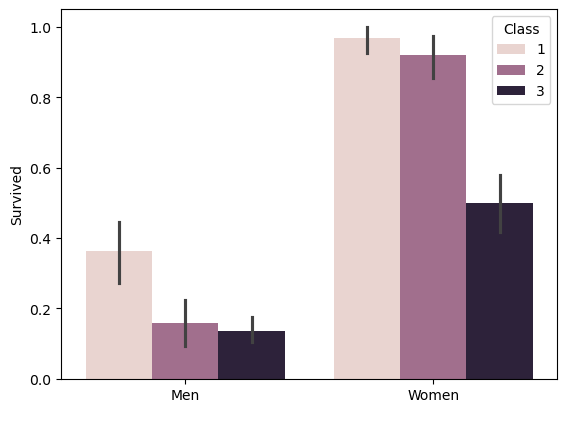

In [49]:
ax = sns.barplot(x="Sex", y="Survived", hue="Pclass", data=dat)

ax.set_xlabel(" ")

ax.set_xticklabels(["Men", "Women"])
ax.legend(title="Class")

plt.show()

In [5]:
#Log Regression
dat["MaleYes"] = LabelEncoder().fit_transform(dat["Sex"])   # female=0, male=1

dat.head()

,PassengerId,Survived,Pclass,FullName,LastName,Prefix,FirstName,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,MaleYes
0,1,0,3,"Braund, Mr. Owen Harris",Braund,Mr,Owen Harris,male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings,Mrs,John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",Heikkinen,Miss,Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle,Mrs,Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",Allen,Mr,William Henry,male,35.0,0,0,373450,8.0500,S,1


In [21]:
X = dat[["MaleYes", "Pclass", "Age"]]
y = dat["Survived"]

logreg =  LogisticRegression() 

logreg.fit(X, y)

print(logreg.intercept_, logreg.coef_)

[4.6622835] [[-2.5142438  -1.18497595 -0.03218504]]


In [35]:
print('Original coefficients: ')
print(logreg.intercept_, logreg.coef_)

print('\n\n')

# Exps:
print('Exponentiated coefficients: ')
print(np.exp(logreg.intercept_), np.exp(logreg.coef_))
X.head(1)

Original coefficients: 
[4.6622835] [[-2.5142438  -1.18497595 -0.03218504]]



Exponentiated coefficients: 
[105.87757733] [[0.08092408 0.30575353 0.96832739]]


,SexInt,Pclass,Age
0,1,3,22.0


In [36]:
y_pred_logreg = logreg.predict(X)
print(confusion_matrix(y, y_pred_logreg))

[[461  80]
 [ 98 241]]


In [22]:
mod = ols('Survived ~ MaleYes + Pclass + Age', data = dat).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     182.6
Date:                Thu, 04 Sep 2025   Prob (F-statistic):           5.78e-92
Time:                        18:55:51   Log-Likelihood:                -401.14
No. Observations:                 880   AIC:                             810.3
Df Residuals:                     876   BIC:                             829.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2834      0.059     21.929      0.000       1.169       1.398
MaleYes       -0.4991      0.028    -18.130      0.000      -0.553      -0.445
Pclass        -0.1896      0.017    -11.123      0.000      -0.223      -0.156
Age           -0.0047      0.001     -4.727      0.000      -0.007      -0.003
==============================================================================
Omnibus:                       33.763   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.783
Skew:                           0.498   Prob(JB):                     1.03e-08
Kurtosis:                       3.107   Cond. No.                         153.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
modlogit = logit('Survived ~ MaleYes + Pclass + Age', data = dat).fit()
modlogit.summary()

Optimization terminated successfully.
         Current function value: 0.451095
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  880
Model:                          Logit   Df Residuals:                      876
Method:                           MLE   Df Model:                            3
Date:                Thu, 04 Sep 2025   Pseudo R-squ.:                  0.3233
Time:                        20:45:06   Log-Likelihood:                -396.96
converged:                       True   LL-Null:                       -586.58
Covariance Type:            nonrobust   LLR p-value:                 6.989e-82
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8088      0.463     10.381      0.000       3.901       5.717
MaleYes       -2.6082      0.188    -13.887      0.000      -2.976      -2.240
Pclass        -1.2178      0.125     -9.715      0.000      -1.464      -0.972
Age           -0.0328      0.007     -4.611      0.000      -0.047      -0.019
==============================================================================
"""

In [53]:
dat.rename(columns={'Prefix': 'Title'}, inplace=True)

In [54]:
#Random Name Generator
import random

In [55]:
def generate_random_name():
    title = random.choice(dat["Title"].tolist())
    first = random.choice(dat["FirstName"].tolist())
    last = random.choice(dat["LastName"].tolist())
    return f"{title}. {first} {last}"

In [64]:
for i in range(5):
    print(generate_random_name())

 Mr.  Henry Samuel ("Mr Henry Marshall") Hodges
 Miss.  Cerin O'Sullivan
 Miss.  Petar Abelson
 Mr.  Brigdet Delia Saad
 the Countess.  Jakob Yasbeck
